In [71]:
import numpy as np
from typing import DefaultDict
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [122]:
fl = open("moby-dick.txt")
fl = fl.read()

In [123]:
text = fl
reg_word = '[\[\]()*\n\s\ufeff",.?!]'
text = list(filter(None, re.split(reg_word, text)))
text = [x.lower() for x in text]
text_freq = DefaultDict(lambda: 0)
for i in text:
  text_freq[i] += 1

In [124]:
cnt = 0
for i in sorted(text_freq, key=text_freq.get, reverse=True):
  cnt += 1
  print(i, ": ", text_freq[i], sep="")
  if cnt == 5:
    break

the: 14444
of: 6697
and: 6404
a: 4676
to: 4654


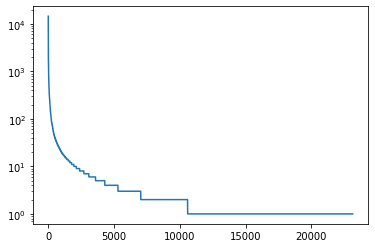

In [125]:
text_freq_list = []
for i in sorted(text_freq, key=text_freq.get, reverse=True):
  text_freq_list.append(text_freq[i])
text_freq_list = np.array(text_freq_list, dtype=np.int32)
plt.yscale('log')
plt.plot(text_freq_list)
plt.show()

In [126]:
chapters = fl
reg_chapter = r'\nCHAPTER [IVXLC]+\. .+\n'
chapters = list(filter(None, re.split(reg_chapter, chapters)))
chapters = chapters[1:]
chapters_freq = []
for i in range(len(chapters)):
  freq = DefaultDict(lambda: 0)
  chapters[i] = list(filter(None, re.split(reg_word, chapters[i])))
  chapters[i] = [x.lower() for x in chapters[i]]
  for j in chapters[i]:
    freq[j] += 1
  chapters_freq.append(freq)

In [127]:
print(len(chapters))

135


In [128]:
chap = 0
for i in chapters_freq:
  chap += 1
  print("chapter", chap)
  cnt = 0
  for j in sorted(i, key=i.get, reverse=True):
    cnt += 1
    print(j, ": ", i[j], sep="")
    if cnt == 3:
      break
  print()

chapter 1
the: 125
of: 81
and: 73

chapter 2
the: 90
a: 50
and: 49

chapter 3
the: 291
a: 227
and: 184

chapter 4
the: 79
and: 63
i: 49

chapter 5
the: 36
and: 26
a: 22

chapter 6
the: 42
and: 30
in: 29

chapter 7
the: 64
of: 35
and: 24

chapter 8
the: 76
a: 40
of: 37

chapter 9
the: 255
and: 118
to: 107

chapter 10
the: 62
and: 52
to: 42

chapter 11
the: 36
and: 24
of: 24

chapter 12
the: 40
and: 32
his: 27

chapter 13
the: 118
and: 63
a: 41

chapter 14
the: 44
and: 24
in: 20

chapter 15
the: 61
a: 43
and: 39

chapter 16
the: 232
and: 160
a: 157

chapter 17
the: 109
and: 80
i: 70

chapter 18
the: 56
and: 48
of: 39

chapter 19
the: 51
and: 42
”: 40

chapter 20
the: 59
and: 47
of: 28

chapter 21
the: 47
”: 44
to: 28

chapter 22
the: 117
and: 59
to: 38

chapter 23
the: 26
that: 10
of: 9

chapter 24
the: 121
of: 68
and: 51

chapter 25
of: 13
a: 11
oil: 8

chapter 26
the: 51
of: 40
and: 38

chapter 27
the: 119
of: 94
in: 46

chapter 28
the: 90
of: 43
to: 31

chapter 29
the: 69
and: 36
of: 

In [129]:
words_chapters_freq = DefaultDict(lambda: 0)
for i in text_freq.keys():
  for j in chapters:
    if i in j:
      words_chapters_freq[i] += 1

In [130]:
print(words_chapters_freq)

defaultdict(<function <lambda> at 0x7f20cb7965f0>, {'the': 135, 'project': 3, 'gutenberg': 1, 'ebook': 1, 'of': 135, 'moby-dick': 1, 'by': 128, 'this': 132, 'is': 131, 'for': 131, 'use': 29, 'anyone': 1, 'anywhere': 13, 'in': 134, 'united': 10, 'states': 7, 'and': 134, 'most': 99, 'other': 115, 'parts': 29, 'world': 73, 'at': 129, 'no': 120, 'cost': 2, 'with': 132, 'almost': 86, 'restrictions': 1, 'whatsoever': 5, 'you': 105, 'may': 92, 'copy': 6, 'it': 135, 'give': 44, 'away': 77, 'or': 120, 're-use': 1, 'under': 67, 'terms': 12, 'license': 3, 'included': 6, 'online': 1, 'www': 1, 'org': 1, 'if': 115, 'are': 115, 'not': 131, 'located': 1, 'will': 103, 'have': 127, 'to': 134, 'check': 2, 'laws': 4, 'country': 15, 'where': 81, 'before': 97, 'using': 11, 'recently': 5, 'november': 1, 'language:': 1, 'english': 18, 'character': 13, 'set': 47, 'produced': 6, 'f': 2, 'start': 15, 'whale': 97, 'contents': 7, 'extracts': 2, 'chapter': 20, 'i': 123, 'ii': 2, '—the': 15, 'carpet': 3, 'bag': 8, 

In [131]:
chapters_tfidf = []